<a href="https://colab.research.google.com/github/char7927/char7927.github.io/blob/main/Copy_of_BIOC0003_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hi, the hash means that colab will ignore this text - that is why it is green
!pip install FlowCal==1.3.0 #this line will install the 1.3.0 version of FlowCal
#this website has the documentation on its functions: https://flowcal.readthedocs.io/en/latest/
#some python libraries are as well documented as this one...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.4 MB/s eta 0:00:00
  Created wheel for FlowCal: filename=FlowCal-1.3.0-py3-none-any.whl size=84527 sha256=6de6eb934826eb04b6808558172a9c34218dda97825daad7b2de25870c882785
  Stored in directory: /root/.cache/pip/wheels/b1/9c/f3/4c59694424e6a6d70b11b66f076d8a2359b57dfdb9b723ed3f
Successfully built FlowCal
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
import FlowCal #even though it is installed, you still have to tell python that you plan to use it!
#numpy is so important it comes pre-installed, it's very useful for handling multi-dimensional arrays (arrays = a fancy way of saying tables)
import numpy as np #the 'as np' part means from now on we can write np instead of numpy
import matplotlib.pyplot as plt #this is a library for plotting graphs

#FlowCal relies on numpy and matplotlib.pyplot to function

In [ ]:
!wget https://char7927.github.io/BIOC0003/file1.fcs
!wget https://char7927.github.io/BIOC0003/file2.fcs
!wget https://char7927.github.io/BIOC0003/file3.fcs
#these files are the negative control, the positive control, and one sample

--2023-11-29 11:27:26--  https://char7927.github.io/BIOC0003/file1.fcs
Resolving char7927.github.io (char7927.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to char7927.github.io (char7927.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 952742 (930K) [application/vnd.isac.fcs]
Saving to: ‘file1.fcs’

file1.fcs           100%[===================>] 930.41K  --.-KB/s    in 0.05s   

2023-11-29 11:27:26 (16.7 MB/s) - ‘file1.fcs’ saved [952742/952742]

--2023-11-29 11:27:26--  https://char7927.github.io/BIOC0003/file2.fcs
Resolving char7927.github.io (char7927.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to char7927.github.io (char7927.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4272033 (4.1M) [application/vnd.isac.fcs]
Saving to: ‘file2.fcs’

file2.fcs           100%[===================>]   4.07M  --.-KB/s    in 0.

In [ ]:
transformedFile1 = FlowCal.transform.to_rfi(FlowCal.io.FCSData('file1.fcs'))
print(transformedFile1.shape[0])
print(transformedFile1.channels)

16969
('FSC-A', 'SSC-A', 'FL1-A', 'FL2-A', 'FL3-A', 'FL4-A', 'FSC-H', 'SSC-H', 'FL1-H', 'FL2-H', 'FL3-H', 'FL4-H', 'Width', 'Time')


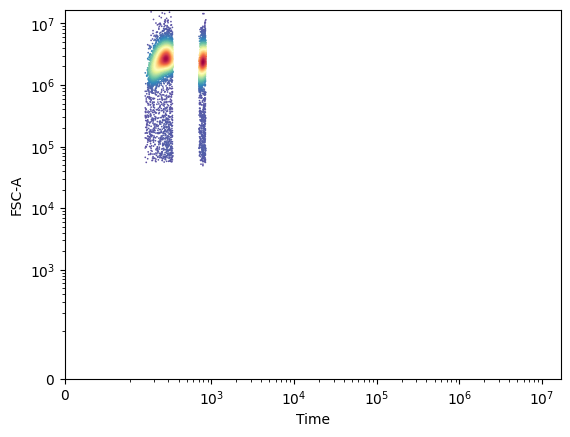

In [ ]:
#FlowCal has lots of methods for displaying data - let's look at the autocomplete...
FlowCal.plot.density2d(transformedFile1,['Time','FSC-A'],1024,'scatter')
#FlowCal.plot.density2d(transformedFile1,['FL1-H','FSC-H'],1024,'scatter')

**Data types:**

5 is an int

5.3 is a float

'text' is a string

[0,3,5,7] is a list of ints

['this', 'is', 'a'] is a list of strings

lists can contain lots of different types of data

In [ ]:
#gating data is a way to focus on the cells you are interested in
gatedFile1 = FlowCal.gate.density2d(transformedFile1,['FSC-A','SSC-A'],full_output=True)
FlowCal.plot.density2d(gatedFile1.gated_data,channels=['FSC-A', 'SSC-A'],mode='scatter')
plt.show()
FlowCal.plot.density_and_hist(transformedFile1,gatedFile1.gated_data,gatedFile1.contour,['FSC-A', 'SSC-A'],{'mode':'scatter'},['FL1-H','FL4-H'])
#plt.tight_layout()

In [ ]:
#lets display the data from the second file...

In [ ]:
#lets do that more efficiently...
for i in range(1,15,2):
  print(i)

1
3
5
7
9
11
13
